<a href="https://colab.research.google.com/github/sanjivyash/SHALA2020/blob/master/Assignment_ML_L2_YashSanjeev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


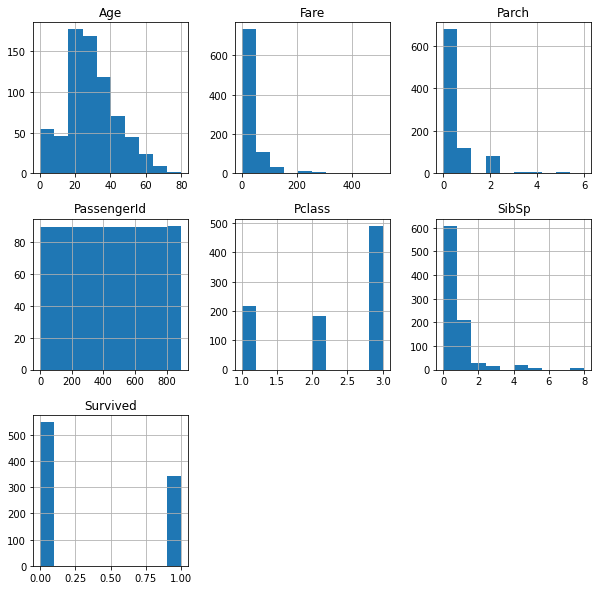

In [5]:
titanic_data.hist(figsize = (10,10))
plt.show()

In [6]:
titanic_data["Title"] = titanic_data["Name"].apply(lambda x: x.split(", ")[1].split(".")[0])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [7]:
# Too many NaN values in Cabin for any use
titanic_data.drop(["Cabin","Name","Ticket","PassengerId"], axis  = 1, inplace = True)
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

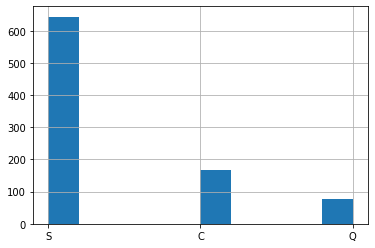

In [8]:
titanic_data["Embarked"].hist()

In [9]:
result = titanic_data.groupby("Title").mean()["Age"]
result["Jonkheer"]

38.0

In [10]:
df = titanic_data[titanic_data["Age"].isnull()]
print(df.iat[0,3])
df.head()

nan


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,male,NaN,0,0,8.4583,Q,Mr
17,1,2,male,NaN,0,0,13.0000,S,Mr
19,1,3,female,NaN,0,0,7.2250,C,Mrs
26,0,3,male,NaN,0,0,7.2250,C,Mr
28,1,3,female,NaN,0,0,7.8792,Q,Miss


In [0]:
for i in range(df.shape[0]):
    df.iat[i,3] = result[df.iloc[i,8]]  

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,male,32.368090,0,0,8.4583,Q,Mr
17,1,2,male,32.368090,0,0,13.0000,S,Mr
19,1,3,female,35.898148,0,0,7.2250,C,Mrs
26,0,3,male,32.368090,0,0,7.2250,C,Mr
28,1,3,female,21.773973,0,0,7.8792,Q,Miss


# NaN values

Filling the Age column with mean value seemed less accurate,  so I extracted a feature "Title" and imputed the age with mean of the same title. This would atleast differ men from children and ladies. 

Since Embarked had only two NaN values, I dropped those rows

In [13]:
titanic_data.dropna(axis = 0, inplace = True)
titanic_data = pd.concat([titanic_data, df])
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [14]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
6,0,1,male,54.0,0,0,51.8625,S,Mr
7,0,3,male,2.0,3,1,21.0750,S,Master
8,1,3,female,27.0,0,2,11.1333,S,Mrs
9,1,2,female,14.0,1,0,30.0708,C,Mrs
10,1,3,female,4.0,1,1,16.7000,S,Miss


In [15]:
S = pd.get_dummies(titanic_data[["Sex", "Embarked"]], drop_first = True)
data = pd.concat([titanic_data, S], axis = 1)
data.drop(["Sex", "Embarked"], axis = 1, inplace = True)
print(data.shape)
data.head()

(889, 10)


,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,Mr,1,0,1
1,1,1,38.0,1,0,71.2833,Mrs,0,0,0
2,1,3,26.0,0,0,7.9250,Miss,0,0,1
3,1,1,35.0,1,0,53.1000,Mrs,0,0,1
4,0,3,35.0,0,0,8.0500,Mr,1,0,1


In [0]:
d = {}
count = 0 
def rep(x):
    global count
    if not x in d:
        d[x] = count
        count += 1
    return d[x]

In [0]:
for x in data["Title"]:
    rep(x)

In [18]:
d

{'Capt': 14,
 'Col': 13,
 'Don': 4,
 'Dr': 6,
 'Jonkheer': 16,
 'Lady': 10,
 'Major': 9,
 'Master': 3,
 'Miss': 2,
 'Mlle': 12,
 'Mme': 7,
 'Mr': 0,
 'Mrs': 1,
 'Ms': 8,
 'Rev': 5,
 'Sir': 11,
 'the Countess': 15}

In [19]:
data["Title"] = data["Title"].apply(lambda x: d[x])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,2,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [20]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,1,1,4.00000,0,2,81.8583,3,1,0,1
1,0,3,20.50000,0,0,7.2500,0,1,0,1
2,0,3,20.00000,0,0,7.0500,0,1,0,1
3,0,3,32.36809,0,0,8.0500,0,1,0,1
4,0,3,20.00000,0,0,8.0500,0,1,0,1


In [21]:
data["Family Size"] = data["SibSp"] + data["Parch"]
data.drop(["SibSp", "Parch"], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Age,Fare,Title,Sex_male,Embarked_Q,Embarked_S,Family Size
0,1,1,4.00000,81.8583,3,1,0,1,2
1,0,3,20.50000,7.2500,0,1,0,1,0
2,0,3,20.00000,7.0500,0,1,0,1,0
3,0,3,32.36809,8.0500,0,1,0,1,0
4,0,3,20.00000,8.0500,0,1,0,1,0


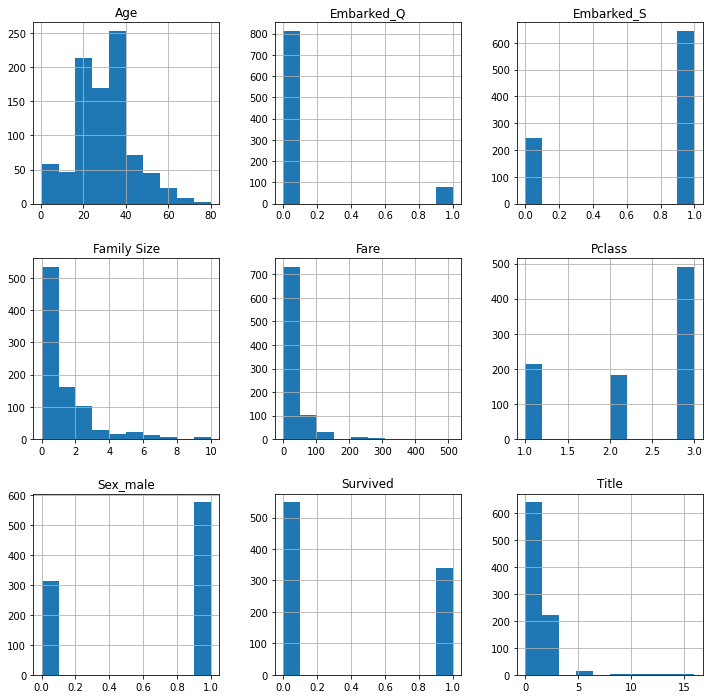

In [22]:
data.hist(figsize = (12,12))
plt.show()

In [0]:
X = data.drop(["Survived"], axis = 1)
y = data.Survived

In [24]:
for name in X.columns:
    X[name] -= X[name].mean()
    X[name] /= X[name].std()

X.head()

,Pclass,Age,Fare,Title,Sex_male,Embarked_Q,Embarked_S,Family Size
0,-1.571327,-1.941038,1.001290,1.195916,0.734928,-0.307768,0.616447,0.677130
1,0.824744,-0.695288,-0.499958,-0.541289,0.734928,-0.307768,0.616447,-0.561488
2,0.824744,-0.733038,-0.503983,-0.541289,0.734928,-0.307768,0.616447,-0.561488
3,0.824744,0.200753,-0.483861,-0.541289,0.734928,-0.307768,0.616447,-0.561488
4,0.824744,-0.733038,-0.483861,-0.541289,0.734928,-0.307768,0.616447,-0.561488


0    549
1    340
Name: Survived, dtype: int64


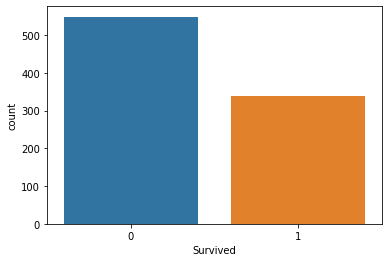

In [25]:
print(data["Survived"].value_counts())
sns.countplot(y)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X , y, stratify = y, test_size = 0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 69)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random Forest Classifier :")
print(classification_report(y_test, y_pred))

Random Forest Classifier :
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.78      0.75      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.83       178



In [28]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 2500, random_state = 69)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print("Neural Network Classifier :")
print(classification_report(y_test, y_pred))

Neural Network Classifier :
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       110
           1       0.88      0.68      0.77        68

    accuracy                           0.84       178
   macro avg       0.86      0.81      0.82       178
weighted avg       0.85      0.84      0.84       178



In [29]:
from sklearn.svm import SVC
svm = SVC(random_state = 69)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Classifier :")
print(classification_report(y_test, y_pred))

SVM Classifier :
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       110
           1       0.96      0.63      0.76        68

    accuracy                           0.85       178
   macro avg       0.88      0.81      0.82       178
weighted avg       0.87      0.85      0.84       178



In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear", random_state = 69)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression :")
print(classification_report(y_test, y_pred))

Logistic Regression :
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.81      0.82      0.82        68

    accuracy                           0.86       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178



In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train.drop("Age", axis = 1), y_train)
y_pred = dt.predict(X_test.drop("Age", axis = 1))
print("Decision Tree Classifier :")
print(classification_report(y_test, y_pred))

Decision Tree Classifier :
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.69      0.76        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178



In [32]:
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(random_state = 69)
nn = SVC(random_state = 69)
lr = LogisticRegression(solver = "liblinear", random_state = 69)

classifier = [("Random Forest Classifier", rfc),
              ("Neural Network", nn),
              ("Logistic Regression", lr)]

vc = VotingClassifier(estimators = classifier)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print("Voting classifier: ", (y_test == y_pred).mean())

Voting classifier:  0.8764044943820225


In [33]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(random_state = 69)
bc = BaggingClassifier(base_estimator=dt, n_estimators=500, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
print("Bagging Decision Tree Classifier :")
print(classification_report(y_test, y_pred))

Bagging Decision Tree Classifier :
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.76      0.78        68

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 69)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBoost Classifier :")
print(classification_report(y_test, y_pred))

XGBoost Classifier :
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       110
           1       0.88      0.75      0.81        68

    accuracy                           0.87       178
   macro avg       0.87      0.84      0.85       178
weighted avg       0.87      0.87      0.86       178



In [35]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = 69)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("XGBoost Classifier :")
print(classification_report(y_test, y_pred))

XGBoost Classifier :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        68

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.84      0.84      0.84       178



In [36]:
xgb = XGBClassifier(random_state = 69)
nn = MLPClassifier(max_iter = 2000, random_state = 69)
lr = LogisticRegression(solver = "liblinear", random_state = 69)

classifier = [("XGBoost Classifier", xgb),
              ("Neural Network", nn),
              ("Logistic Regression", lr)]

vc = VotingClassifier(estimators = classifier)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print("Voting classifier: ", (y_test == y_pred).mean())

Voting classifier:  0.8539325842696629


In [37]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(random_state = 69)
abc = AdaBoostClassifier(base_estimator = dt)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print("AdaBoost Classifier :")
print(classification_report(y_test, y_pred))

AdaBoost Classifier :
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       110
           1       0.68      0.74      0.70        68

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.77       178



In [38]:
lr = LogisticRegression(random_state = 69)
abc = AdaBoostClassifier(base_estimator = lr)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print("AdaBoost Classifier :")
print(classification_report(y_test, y_pred))

AdaBoost Classifier :
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.81      0.82      0.82        68

    accuracy                           0.86       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178



In [39]:
nn = MLPClassifier(max_iter = 2000, random_state = 69)
lgbm = LGBMClassifier(random_state = 69)
svm = SVC(random_state = 69)

classifier = [("XGBoost Classfier", xgb),
              ("Light GBM", lgbm),
              ("SVM Classifier", svm)]

vc = VotingClassifier(estimators = classifier)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print("Voting classifier: ", (y_test == y_pred).mean())

Voting classifier:  0.8707865168539326


In [40]:
xgb = XGBClassifier(random_state = 69)
nn = MLPClassifier(max_iter = 2000, random_state = 69)
rfc = RandomForestClassifier(random_state = 69)

classifier = [("XGBoost Classifier", xgb),
              ("Neural Network", nn),
              ("Random Forest Classifier", rfc)]

vc = VotingClassifier(estimators = classifier)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print("Voting classifier: ", (y_test == y_pred).mean())

Voting classifier:  0.8651685393258427
